# **Описание проекта**

Представлены данные о некоторых пользователях сервиса аренды самокатов **GoFast** из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

### **Задача**

Проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

### **Тарификация сервиса**

<u>Базовый вариант тарифа:</u>
* без подписки
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

<u>С подпиской Ultra:</u>
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

### **Описание данных**

**датасет "Пльзователи" users_go.csv**
* **user_id** -	уникальный идентификатор пользователя
* **name** - имя пользователя; 
* **age** - возраст; 
* **city** - город;
* **subscription_type**	- тип подписки (free, ultra).

**датасет "Поездки" rides_go.csv**
* **user_id** -	уникальный идентификатор пользователя;
* **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* **date** - дата совершения поездки.

**датасет "Подписки" subscriptions_go.csv**
* **subscription_type** - тип подписки;
* **minute_price** - стоимость одной минуты поездки по данной подписке; 
* **start_ride_price** - стоимость начала поездки; 
* **subscription_fee** - стоимость ежемесячного платежа.

### **План исследования проекта**

1) Загрузим предосталвенные данные; 

2) Оценим состояние и качество данных; 

3) Нормализуем представленные данные; 

4) Приведем столбец date к типу даты pandas.

5) Создадим новый столбец с номером месяца на основе столбца date.

6) Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаим их, если такие значения присутствуют.

7) Опишем и визуализируем общую информацию о пользователях и поездках:
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.

8) Объединим данные;
* о пользователях, поездках и подписках в один датафрейм.
* создадим ещё два датафрейма из датафрейма, созданного выше:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

9) Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

10) Подсчитаем выручку; 

11) Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из пункта 8: 
* найдем суммарное расстояние;
* количество поездок;
* суммарное время для каждого пользователя за каждый месяц.

12) В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

13) Проверим гипотезы:
* тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки;
* расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
* техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Из-за этого количество обращений в техподдержку значимо снизилось?

14) Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

15) С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

# **1. Загрузка данных**

### **1.0. Настройка рабочего пространства**

In [1]:
from IPython.display import display, HTML 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>")) # чтобы листик в джупитре был пошире - не работает
pd.set_option("display.max_columns", None) # чтобы сам df был пошире
pd.set_option('display.max_colwidth', None) # чтобы df колонки были пошире
pd.set_option('display.float_format', '{:.2f}'.format) # для dataframe чтобы числа не печатал экспоненциально
pd.options.display.expand_frame_repr = False # для принта чтобы колонки не переносил рабоатет тольок в vs code, in jupyter notebook получается каша


### **1.1. Загрузка данных**

Загрузим CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:

In [3]:
try:
    users_go_df = pd.read_csv('C:/Users/dmi-a/OneDrive/Рабочий стол/DS учеба/datasets/users_go.csv')
    rides_go_df = pd.read_csv('C:/Users/dmi-a/OneDrive/Рабочий стол/DS учеба/datasets/rides_go.csv')
    subscriptions_go_df = pd.read_csv('C:/Users/dmi-a/OneDrive/Рабочий стол/DS учеба/datasets/subscriptions_go.csv')
except:
    users_go_df = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides_go_df = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions_go_df = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### **1.2. Общая информация о каждом датафрейме.**

In [4]:
users_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subscriptions_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Поле date в таблице rides_go_df требует замены типа данных на специлизированный тип данных.

В остальном, данные выглядят корректно.

Типы данных в ключевых столбцах user_id и subscription_type, по которым будет производиться объединеение, одинаковы.



# **2. Предобработка данных**

### **2.1. Приведение типа столбца date**


Приведем столбец с датой к специализированному типу данных.

In [7]:
rides_go_df['date'] = pd.to_datetime(rides_go_df['date'])

In [8]:
# rides_go_df['date'].info() - но у меня в vs code это работает инфо для отдельного столбца
rides_go_df['date'].dtype

dtype('<M8[ns]')

Нормализация типов прошла успешно.

### **2.2. Новый столбец с номером месяца на основе date.**

In [9]:
rides_go_df['month'] = rides_go_df['date'].dt.month
rides_go_df['year'] = rides_go_df['date'].dt.year
rides_go_df[['date', 'year', 'month']].sample(4)

,date,year,month
12890,2021-02-07,2021,2
6389,2021-07-25,2021,7
4035,2021-03-29,2021,3
4997,2021-12-21,2021,12


Месяц успешно выделен в отдельную колонку.

### **2.3. Пропуски: проверка и обработка**

In [10]:
users_go_df_null = users_go_df.copy()            
missing_stats = pd.DataFrame({'Кол-во пропусков': users_go_df_null.isnull().sum(),
                              'Объем пропусков': (100 * users_go_df_null.isnull().mean()).round(2).astype(str) + ' %'})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Нет пропусков в таблице о пользователях users_go_df"

'Нет пропусков в таблице о пользователях users_go_df'

In [11]:
rides_go_df_null = rides_go_df.copy()            
missing_stats = pd.DataFrame({'Кол-во пропусков': rides_go_df_null.isnull().sum(),
                              'Объем пропусков': (100 * rides_go_df_null.isnull().mean()).round(2).astype(str) + ' %'})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Нет пропусков в таблице о поездках rides_go_df"

'Нет пропусков в таблице о поездках rides_go_df'

In [12]:
subscriptions_go_df_null = subscriptions_go_df.copy()            
missing_stats = pd.DataFrame({'Кол-во пропусков': subscriptions_go_df_null.isnull().sum(),
                              'Объем пропусков': (100 * subscriptions_go_df_null.isnull().mean()).round(2).astype(str) + ' %'})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Нет пропусков в таблице о подписках subscriptions_go_df"

'Нет пропусков в таблице о подписках subscriptions_go_df'

Пропуски не обнаружены в трех представленных датасетах. 

### **2.4. Дубликаты: проверка и обработка**

Для начала вспомним и зафиксируем размер таблицы.

In [13]:
print(f'- Размер таблицы users_go_df: {len(users_go_df)} наблюдений')
print(f'- Размер таблицы rides_go_df: {len(rides_go_df)} наблюдений')
print(f'- Размер таблицы subscriptions_go_df: {len(subscriptions_go_df)} наблюдения')

- Размер таблицы users_go_df: 1565 наблюдений
- Размер таблицы rides_go_df: 18068 наблюдений
- Размер таблицы subscriptions_go_df: 2 наблюдения


##### **2.1.1. Явные дубликаты**

Проверим, есть ли в данных явные дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [14]:
print(f'- В таблице users_go_df {users_go_df.duplicated().sum()} явный дубликат')
print(f'- В таблице rides_go_df {rides_go_df.duplicated().sum()} явных дублей')
print(f'- В таблице subscriptions_go_df {subscriptions_go_df.duplicated().sum()} явных дублей')

- В таблице users_go_df 31 явный дубликат
- В таблице rides_go_df 0 явных дублей
- В таблице subscriptions_go_df 0 явных дублей


In [15]:
users_go_df.query('user_id == 403')

,user_id,name,age,city,subscription_type
402,403,Полина,19,Сочи,ultra
1537,403,Полина,19,Сочи,ultra


In [16]:
users_go_df[users_go_df.duplicated()].sort_values('age')

,user_id,name,age,city,subscription_type
1537,403,Полина,19,Сочи,ultra
1562,307,Ясмина,19,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1547,635,Герман,21,Москва,ultra
1539,43,Стефания,22,Омск,ultra
1558,1237,Евгения,23,Тюмень,free
1543,153,Герман,23,Москва,ultra
1559,209,Андрей,23,Омск,ultra
1546,924,Мария,23,Пятигорск,free
1555,72,Никита,25,Москва,ultra


Почему образовались дубликаты - неизвестно. Удалим 31 явный дубликат из таблицы users_go_df. Отсутвие дубликатов также важно и для буущего объеинения таблиц.

In [17]:
users_go_df = users_go_df.drop_duplicates()
users_go_df[users_go_df.duplicated()]

,user_id,name,age,city,subscription_type


Дубликаты удалены успешно.

##### **2.4.2. Неявные дубликаты**

Попытаемся определить неявные дубликаты в таблице users_go_df.

In [18]:
df_list = [users_go_df, rides_go_df, subscriptions_go_df]
for df in df_list:
    for col in df:
        print(f'Столбец: {col}')
        print(f'Уникальных значений: {df[col].nunique()}\n {sorted(df[col].unique())}')
        print('='*30)

Столбец: user_id
Уникальных значений: 1534
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213

Неявных дубликатов невыявлено.

# **3. Исследовательский анализ данных**

Опишем и визуализируем общую информацию о пользователях и поездках.

### **3.1 Частота встречаемости городов**

Рассчитаем частоту встречаемости городов.

In [19]:
city_frequency = users_go_df.pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id', ascending=False).reset_index()
city_frequency

,city,user_id
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


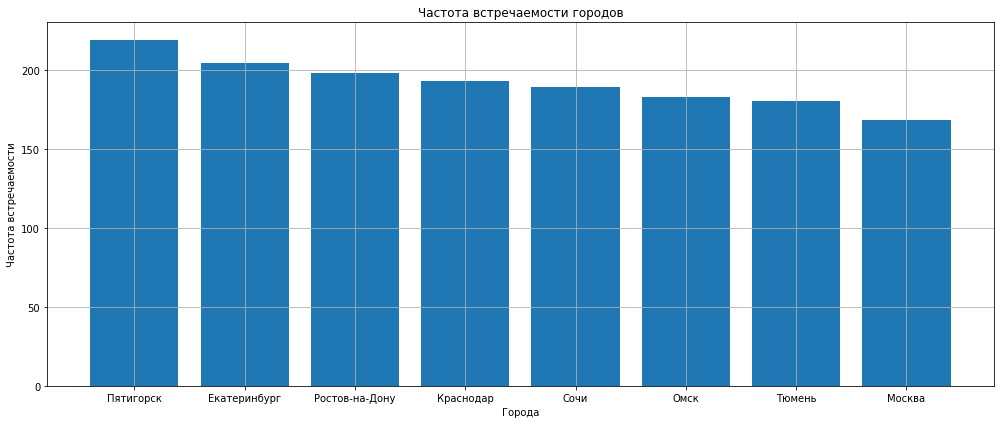

In [20]:
plt.figure(figsize=(14, 6))
plt.bar(city_frequency['city'], city_frequency['user_id'])
plt.xlabel('Города')
plt.ylabel('Частота встречаемости')
plt.title('Частота встречаемости городов')
plt.grid(True)
plt.tight_layout()
plt.show()

Мы видим, что больше всего пользователей в Пятигорске. Меньше всего пользователей в Москве. Вероятно, наиболее удобны и интересны самокаты для жителей небольших городов.

### **3.2 Соотношение пользователей с подпиской и без подписки**


Рассчитаем соотноение пользователей с подпиской и без подписки.

In [21]:
subscription_mean = users_go_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subscription_mean.columns = ['count']
subscription_mean['mean'] = subscription_mean['count'] / subscription_mean['count'].sum()
subscription_mean

,count,mean
subscription_type,,
free,835,0.54
ultra,699,0.46


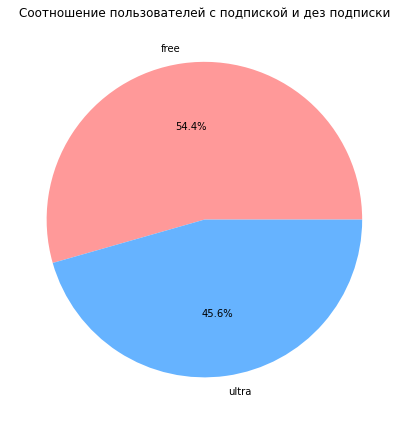

In [22]:
plt.figure(figsize=(14,6))
plt.pie(subscription_mean['mean'], 
         labels=subscription_mean.index,
         autopct='%1.1f%%',
         colors=['#ff9999', '#66b3ff'])
plt.title('Соотношение пользователей с подпиской и дез подписки')
plt.tight_layout()
plt.show()

Мы видим, что:
* без подписки 54 % пользоваателей;
* с подпиской  46 % пользователей.

### **3.3 Возраст пользователей**

In [23]:
users_age = users_go_df.pivot_table(index='age', values='user_id', aggfunc='count')
users_age

,user_id
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


Распределение уже видим, но все равно нарисуем.

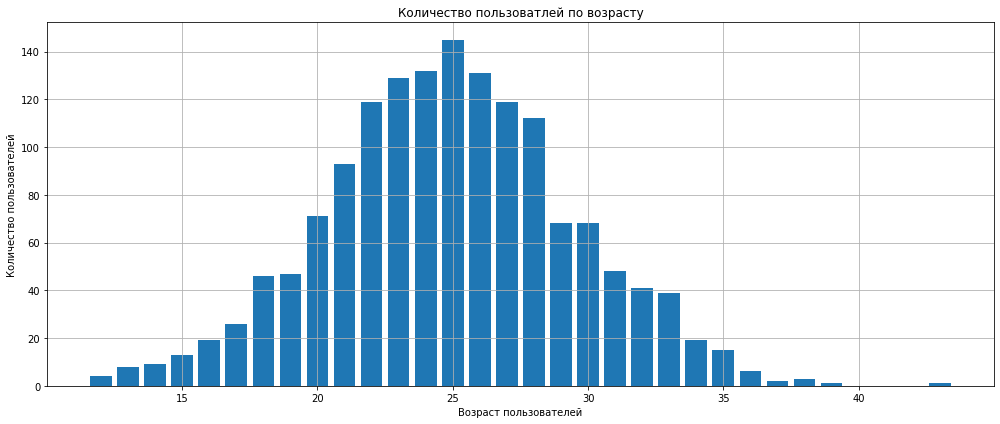

In [24]:
plt.figure(figsize=(14,6))
plt.bar(users_age.index, users_age['user_id'])
plt.title('Количество пользоватлей по возрасту')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.tight_layout()
plt.show()

Мы наблюдаем на гистограмме номральное распределение. Больше всего пользователей в возрасте 25 лет.

### **3.4 Расстояние, которое пользователь преодолел за одну поездку**


Необходимо описать и визуализировать расстояние, которое пользователь преодолел за одну поездку.

Каждое наблюдение в датасете уже представляет информацию об одной поездке.

* distance хранит значение об одной поездке в метрах.

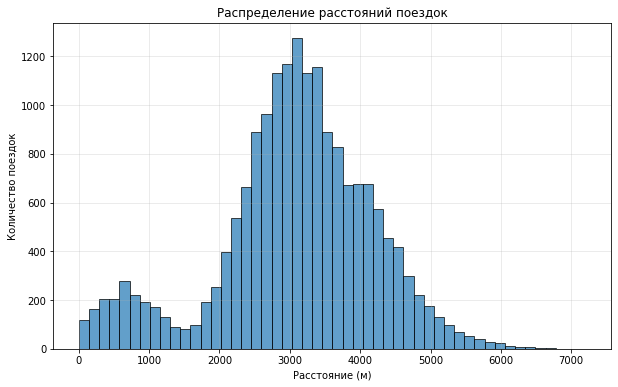

Статистика расстояний:
count   18068.00
mean     3070.66
std      1116.83
min         0.86
25%      2543.23
50%      3133.61
75%      3776.22
max      7211.01
Name: distance, dtype: float64


In [25]:
plt.figure(figsize=(10, 6))
plt.hist(rides_go_df['distance'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояний поездок')
plt.grid(True, alpha=0.3)
plt.show()

# Описательная статистика
print("Статистика расстояний:")
print(rides_go_df['distance'].describe())

Визуально поездки можно разделить на две подгруппы:
* тех, кто в среднем проезжает 600 метров за одну поездку;
* тех, кто проезжает всреднем 3100 метров за одну поездку.

Мы видим, что в среднем пользователи проезжают 3070-3133 метров за одну поездку.

### **3.5 Продолжительность поездок**

Сгруппируем количество поездок по их продолжительность, сосчитаем количество пользователей, и посмотрим среднюю продолжительность одной поездки.

In [26]:
rides_go_df.pivot_table(index='duration', values='distance', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,distance,distance,distance
duration,,,
0.50,95,485751.77,5113.18
2.04,1,11.28,11.28
2.05,1,23.96,23.96
2.18,1,84.41,84.41
2.22,1,111.30,111.30
...,...,...,...
38.27,1,4210.87,4210.87
38.35,1,4831.34,4831.34


Мы заметили, 
* что 95 человек берут самокат в аренду на полминуты.
* За это время успевают проехать всреднем 5,113 км. 

Находим разумным округлить все продолжительности поездок **duration** до минуты. Посмотрм сначлаа на значения до округления и после округления.

In [27]:
rides_go_df['duration'] = rides_go_df['duration'].round(0)
duration_pivot = rides_go_df.pivot_table(index='duration', values='distance', aggfunc=['count', 'sum', 'mean'])
duration_pivot

,count,sum,mean
,distance,distance,distance
duration,,,
0.00,95,485751.77,5113.18
2.00,18,1939.48,107.75
3.00,40,12849.87,321.25
4.00,74,31199.08,421.61
5.00,123,75338.12,612.51
6.00,151,116397.55,770.84
7.00,228,265393.61,1164.01
8.00,247,344852.40,1396.16


Построим распределние продолжительности поездки по минутам.

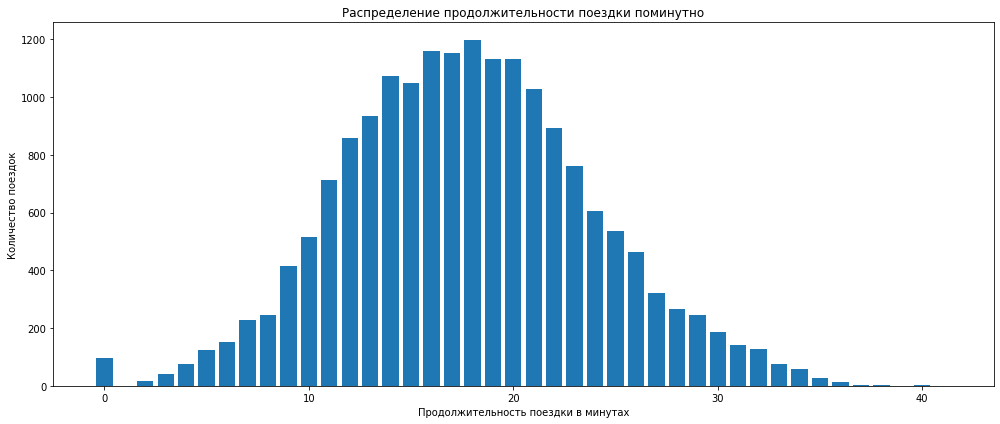

In [28]:
plt.figure(figsize=(14,6))
plt.bar(duration_pivot.index, duration_pivot[('count', 'distance')])
plt.title('Распределение продолжительности поездки поминутно')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.tight_layout()
plt.show()

Мы видим, что данные распределены номрально. 
* В среднем, наибольшее количество поездок (1199) длилось 18 минут.
* В среднем проезжает пользователь за это время 3,197 км.

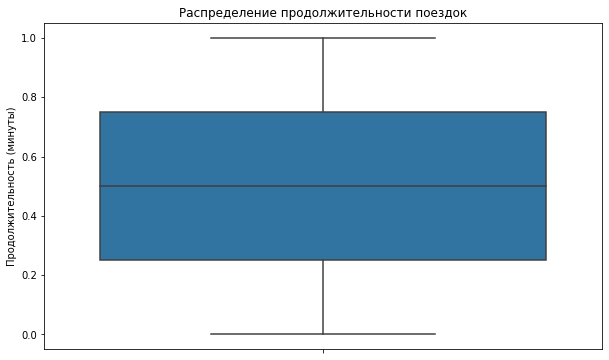

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=df.index)
plt.title('Распределение продолжительности поездок')
plt.ylabel('Продолжительность (минуты)')
plt.show()

Видим, что основной объем поездок с продолжительностью в диапазоне 15-23 мин. Но есть и единичные выбросы от 34 мин до 41 мин.

# **4. Объединение данных**

Объединение будет производиться по ключевым столбцам user_id и subscription_type. Для корректного объединнения важно проверить, что в этих полях нет дубликатов и верный тип данных стоит. Раннее уже проверили: типы совпадают и дубликатов нет.

### **4.1 Объедининие данных о пользователях, поездках и подписках**

Зафиксируем размер самого большого датафрейма до объединения, взятого за основу - rides_go_df - содержит информацию о поездках - к нему уже приклеим все остальное.

In [30]:
before_merge_size = len(rides_go_df)
before_merge_size

18068

Объедининие данных о пользователях, поездках и подписках в один датафрейм: для этого воспользуемся методом merge().

Чтобы объединение произошло корректно, надо оставить только уникальные значения. Основная проблема при объединениии: один пользователь - много поездок.

In [31]:
df = users_go_df.merge(rides_go_df, on='user_id', how='left')
df = df.merge(subscriptions_go_df, on='subscription_type', how='left')
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.00,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.00,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.00,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.00,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.00,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20.00,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.00,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.00,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.00,2021-11-27,11,2021,8,50,0


проверим не нарушена ли размерность:

In [32]:
if before_merge_size - len(df) == 0:
    print('Слияние таблиц произошло корректно, размерность не нарушена.')
else:
    print("Объединение таблиц произошло некорректно, надо переделать.")

Слияние таблиц произошло корректно, размерность не нарушена.


### **4.2 Создание ещё двух датафреймов**

Создадим еще два датафрейма из датафрейма, созданного выше:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

In [33]:
free_df = df[df['subscription_type'] == 'free']
ultra_df = df[df['subscription_type'] == 'ultra']

In [34]:
free_df.sample(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
13415,1205,Марк,16,Москва,free,2471.27,11.00,2021-02-20,2,2021,8,50,0
16485,1422,Светлана,33,Тюмень,free,695.87,13.00,2021-02-14,2,2021,8,50,0
8439,843,Мирослава,23,Сочи,free,4423.07,18.00,2021-11-22,11,2021,8,50,0


In [35]:
ultra_df.sample(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
1326,143,Таисия,28,Москва,ultra,3216.63,31.00,2021-11-11,11,2021,6,0,199
2357,251,Василий,20,Сочи,ultra,4036.81,22.00,2021-01-27,1,2021,6,0,199
3120,336,Игорь,24,Екатеринбург,ultra,1088.49,18.00,2021-06-07,6,2021,6,0,199


Разделили на отдельные две таблицы пользователей с подпиской и пользователей без подписки.

### **4.3 Визуализация информации о расстоянии и времени поездок**

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Вероятно просят посчитать корреляцию и влияние олного показателя на другой в сравнении.

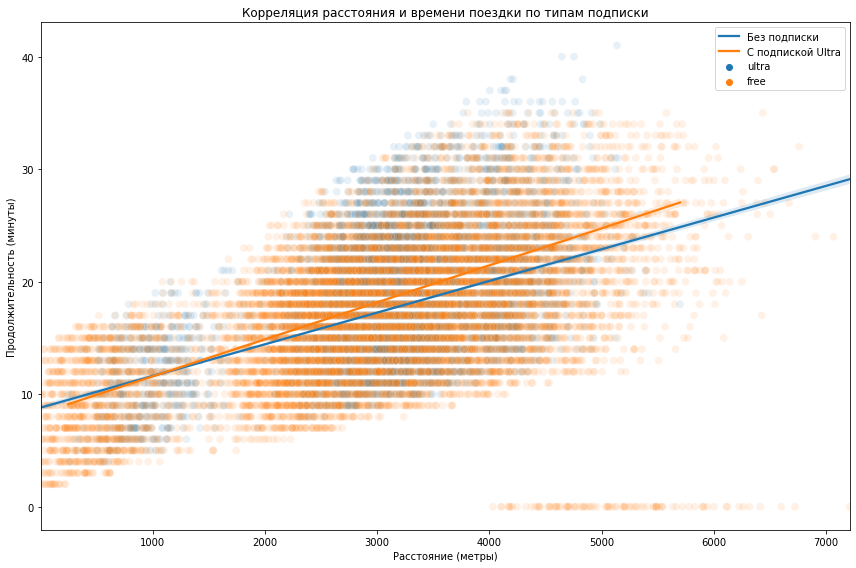

Корреляция для Free: 0.553
Корреляция для Ultra: 0.493


In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='distance', y='duration', 
                hue='subscription_type', alpha=0.1, s=60)

# Добавляем линии тренда для каждой группы
sns.regplot(data=df[df['subscription_type'] == 'free'], 
            x='distance', y='duration', scatter=False, label='Без подписки')
sns.regplot(data=df[df['subscription_type'] == 'ultra'], 
            x='distance', y='duration', scatter=False, label='С подпиской Ultra')

plt.xlabel('Расстояние (метры)')
plt.ylabel('Продолжительность (минуты)')
plt.title('Корреляция расстояния и времени поездки по типам подписки')
plt.legend()
plt.tight_layout()
plt.show()

# Вычисляем корреляции для каждой группы
corr_free = free_df[['distance', 'duration']].corr().iloc[0,1]
corr_ultra = ultra_df[['distance', 'duration']].corr().iloc[0,1]

print(f"Корреляция для Free: {corr_free:.3f}")
print(f"Корреляция для Ultra: {corr_ultra:.3f}")

* Основной объем поездок совершается на рсстояние от 2 до 4,5 км;
* Продолжительность основного объема поездок составляет 10-25 мин;

Пользователи без подписки:
* ездят по времени чуть дольше до 30-35 минут;
* ездят на расстояние чуть дальше до 7 км.
* для них большее значение имеет расстояние и дистанция

Пользователи с подпиской:
* ездят по времени чуть меньше до 28-32 мин.
* ездят на расстояние чуть меньше до 5,5 км.
* те самые короткие сессии аренды в полминуты соврешали именно они.
* для них меньшее значение имеет расстояние и дистанция

У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей.

# **5. Подсчёт выручки**

### **5.1 Пездки: расстояние, количество поездок и время.**

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4 для каждого пользователя найдем: 
* суммарное расстояние, количество поездок
* суммарное время за каждый месяц.

In [37]:
dist_dur_pivot = df.pivot_table(index='user_id', values=['distance', 'duration'], aggfunc=['sum', 'count']).reset_index()
dist_dur_pivot.columns = ['user_id', 'Расстояние', 'Продолжительность', 'Кол-во поездок', 'duration_count']
dist_dur_pivot = dist_dur_pivot[['user_id', 'Кол-во поездок', 'Расстояние', 'Продолжительность']]
print('Общее расстояние и продолжительность всех поездок в сумме.')
dist_dur_pivot

Общее расстояние и продолжительность всех поездок в сумме.


,user_id,Кол-во поездок,Расстояние,Продолжительность
0,1,12,34070.18,206.00
1,2,11,33964.06,198.00
2,3,12,36907.60,234.00
3,4,14,44837.19,290.00
4,5,11,35556.95,174.00
...,...,...,...,...
1529,1530,17,46758.47,291.00
1530,1531,23,67054.79,409.00
1531,1532,13,33902.20,213.00
1532,1533,13,36890.19,242.00


Рассчитали для каждого пользователя общее пройденное расстояние и общую продолжительность поездок.

Перед тем, как заняться выручкой, подготовим данные, в частности, округлим значения продолжительности поездки.

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.
Продолжительность каждой поездки должна быть округлена с помощью метода «потолок» библиотеки numpy — np.ceil()

In [38]:
# каждое значение из столбца duration округляется с помощью «потолка»
df['duration'] = np.ceil(df['duration']) 

Проверим сводную таблицу на пропуски перед расчетом выручки.

In [39]:
dist_dur_pivot.isnull().sum()

user_id              0
Кол-во поездок       0
Расстояние           0
Продолжительность    0
dtype: int64

Пропуски не обнаружены.

### **5.2 Добавление столбца с выручкой**

Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

Помесячная выручка считается по формуле: (стоимость старта поездки ×  количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

In [40]:
# вычислим стоимость данной поездки (без учета стоимости подписки
df['ride_cost'] = (df['minute_price'] * df['duration']) + df['start_ride_price']

# Сгруппируем по пользователю и по месяцу и суммируем поездки
revenue_pivot = df.pivot_table(index=['user_id', 'month'], values=['ride_cost'], aggfunc=['sum']).reset_index()
revenue_pivot.columns = ['user_id', 'Месяц', 'Стоимость поездок']

# чтобы таблица не множилась при присоединенни столбца с подпиской - оставим только уникальные значения
subscription_unique = df[['user_id', 'subscription_fee']].drop_duplicates()

# присоединим стоимость подписки subscription_fee в данном месяце для пользователя
revenue_pivot = revenue_pivot.merge(subscription_unique, on='user_id', how='left')

revenue_pivot.columns = ['user_id', 'Месяц', 'Стоимость поездок', 'Стоимость подписки']

revenue_pivot['Общая прибыль с пользователя в месяц'] = revenue_pivot['Стоимость поездок'] + revenue_pivot['Стоимость подписки']
revenue_pivot


,user_id,Месяц,Стоимость поездок,Стоимость подписки,Общая прибыль с пользователя в месяц
0,1,1,252.00,199,451.00
1,1,4,36.00,199,235.00
2,1,8,270.00,199,469.00
3,1,10,192.00,199,391.00
4,1,11,318.00,199,517.00
...,...,...,...,...,...
11326,1534,6,292.00,0,292.00
11327,1534,8,476.00,0,476.00
11328,1534,9,234.00,0,234.00
11329,1534,11,808.00,0,808.00


Добавим тип подписки по user_id для будущих проверок гипотез. Для этого надо создать список уникальных значений user_id - подписка

In [41]:
user_id_subscr_uniq = df[['user_id', 'subscription_type']].drop_duplicates()
user_id_subscr_uniq.sample(3)

,user_id,subscription_type
8178,825,free
12501,1140,free
3638,392,ultra


In [42]:
revenue_pivot = revenue_pivot.merge(user_id_subscr_uniq, on='user_id')
revenue_pivot

,user_id,Месяц,Стоимость поездок,Стоимость подписки,Общая прибыль с пользователя в месяц,subscription_type
0,1,1,252.00,199,451.00,ultra
1,1,4,36.00,199,235.00,ultra
2,1,8,270.00,199,469.00,ultra
3,1,10,192.00,199,391.00,ultra
4,1,11,318.00,199,517.00,ultra
...,...,...,...,...,...,...
11326,1534,6,292.00,0,292.00,free
11327,1534,8,476.00,0,476.00,free
11328,1534,9,234.00,0,234.00,free
11329,1534,11,808.00,0,808.00,free


Рассчитали общую прибыль с каждого пользователя в месяц.

# **6. Проверка гипотез**

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

Гистограмма плотности пригодится при статистической проверке гипотез: соответствие площади графика над интервалом значений частоте попадания в этот интервал.

### **6.1 Гипотеза: Тратят ли пользователи с подпиской больше времени на поездки?**

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Для проверки гипотезы нужно построить гистограммы плотности для сравнения продолжительности поездок между группами:

- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое

- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки

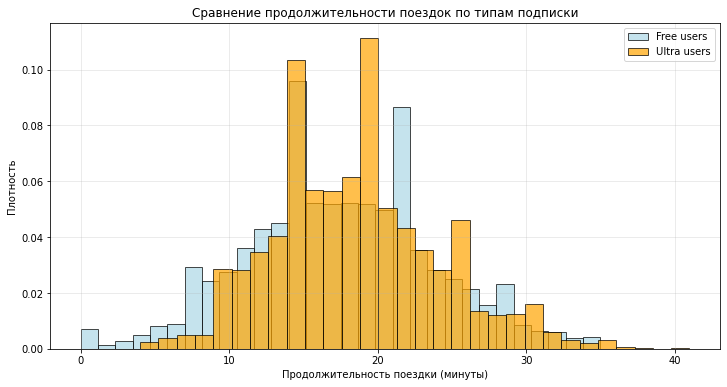

Проверка гипотезы: выручка от пользователей с подпиской выше, чем от пользователей без подписки
H0: ultra_μ₁ 18.55 мин > free_μ₂ 17.39 мин = Пользователи с подпиской тратят больше времени на поездки
H1: ultra_μ₁ 18.55 мин <= free_μ₂ 17.39 = Пользователи с подпиской не тратят больше времени на поездки

Статистика для пользователей без подписки (free):
Среднее: 17.39 мин
Медиана: 17.00 мин
Стандартное отклонение: 6.34 мин
Количество поездок: 11568

Статистика для пользователей с подпиской (ultra):
Среднее: 18.55 мин
Медиана: 18.00 мин
Стандартное отклонение: 5.58 мин
Количество поездок: 6500

Статистический тест (t-test):
t-статистика: 12.3552
p-value: 3.1600689435611813e-35
Различие статистически значимо (p < 0.05)


In [43]:
# Разделяем данные по типам подписки
free_users = free_df['duration']
ultra_users = ultra_df['duration']

# Построение гистограмм плотности для сравнения
plt.figure(figsize=(12, 6))

# Гистограмма плотности для пользователей без подписки
plt.hist(free_users, bins=30, alpha=0.7, density=True, 
         label='Free users', color='lightblue', edgecolor='black')

# Гистограмма плотности для пользователей с подпиской
plt.hist(ultra_users, bins=30, alpha=0.7, density=True, 
         label='Ultra users', color='orange', edgecolor='black')

plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Плотность')
plt.title('Сравнение продолжительности поездок по типам подписки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Проверка гипотезы: выручка от пользователей с подпиской выше, чем от пользователей без подписки")
print(f"H0: ultra_μ₁ {ultra_users.mean():.2f} мин > free_μ₂ {free_users.mean():.2f} мин = Пользователи с подпиской тратят больше времени на поездки")
print(f"H1: ultra_μ₁ {ultra_users.mean():.2f} мин <= free_μ₂ {free_users.mean():.2f} = Пользователи с подпиской не тратят больше времени на поездки\n")


# Описательная статистика
print("Статистика для пользователей без подписки (free):")
print(f"Среднее: {free_users.mean():.2f} мин")
print(f"Медиана: {free_users.median():.2f} мин")
print(f"Стандартное отклонение: {free_users.std():.2f} мин")
print(f"Количество поездок: {len(free_users)}")

print("\nСтатистика для пользователей с подпиской (ultra):")
print(f"Среднее: {ultra_users.mean():.2f} мин")
print(f"Медиана: {ultra_users.median():.2f} мин")
print(f"Стандартное отклонение: {ultra_users.std():.2f} мин")
print(f"Количество поездок: {len(ultra_users)}")

# Статистический тест (t-test для сравнения средних)
# Укажем значение параметра alternative (поскольку гипотезы в этом проекте односторонние)
t_stat, p_value = stats.ttest_ind(ultra_users, free_users, alternative='greater') # наверное, правильное значение greater параметра alternative выбрал 
print(f"\nСтатистический тест (t-test):")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:}")

if p_value < 0.05:
    print("Различие статистически значимо (p < 0.05)")
else:
    print("Различие статистически незначимо (p >= 0.05)")

В среднем пользователи с подпиской тратят времени на поездки на 6% (или на 1 мин 16 сек) больше, чем бользователи без подписки. 

Но судя по тесту, значения практичесуки одинаковы и не различимы, что можно списать на статистическую погрешность и сделать вывод, что пользователи с подпиской и без тратят одинаковое время на поездку.

### **6.2 Гипотеза: Расстоняие не превышает 3130 метров?**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Проверка гипотезы: расстояние поездок пользователей с подпиской не превышает 3130 м
H0: μ ≤ 3130 м
H1: μ > 3130 м

Выборочная статистика:
Среднее расстояние: 3115.45 м
Стандартное отклонение: 836.90 м
Размер выборки: 6500

Результаты теста:
t-статистика: -1.4021
p-value (односторонний): 0.9195

Вывод: Не отвергаем H0 (p >= 0.05)
Нет достаточных оснований утверждать, что расстояние превышает 3130 м


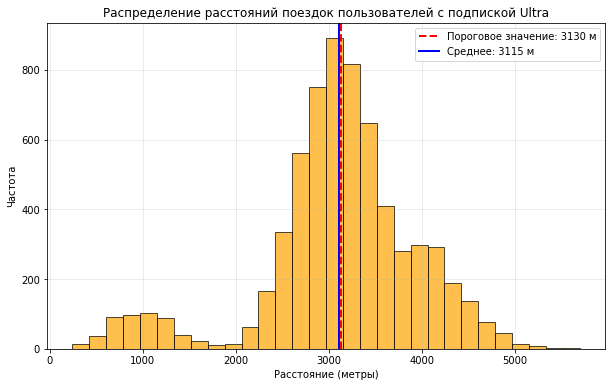

In [44]:
ultra_distances = ultra_df['distance']

# Проверка гипотезы: H0: μ ≤ 3130, 
#                    H1: μ > 3130 (односторонний тест)
# Используем одновыборочный t-test
threshold = 3130
t_stat, p_value = stats.ttest_1samp(ultra_distances, threshold)

# Для односторонней альтернативы (μ > 3130) делим p-value на 2
p_value_one_sided = p_value / 2 if t_stat > 0 else 1 - p_value / 2

print("Проверка гипотезы: расстояние поездок пользователей с подпиской не превышает 3130 м")
print(f"H0: μ ≤ 3130 м")
print(f"H1: μ > 3130 м")
print(f"\nВыборочная статистика:")
print(f"Среднее расстояние: {ultra_distances.mean():.2f} м")
print(f"Стандартное отклонение: {ultra_distances.std():.2f} м")
print(f"Размер выборки: {len(ultra_distances)}")
print(f"\nРезультаты теста:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value (односторонний): {p_value_one_sided:.4f}")

# Вывод
alpha = 0.05
if p_value_one_sided < alpha:
    print(f"\nВывод: Отвергаем H0 (p < {alpha})")
    print("Расстояние поездок пользователей с подпиской ПРЕВЫШАЕТ 3130 м")
else:
    print(f"\nВывод: Не отвергаем H0 (p >= {alpha})")
    print("Нет достаточных оснований утверждать, что расстояние превышает 3130 м")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(ultra_distances, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Пороговое значение: {threshold} м')
plt.axvline(ultra_distances.mean(), color='blue', linestyle='-', linewidth=2, label=f'Среднее: {ultra_distances.mean():.0f} м')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Частота')
plt.title('Распределение расстояний поездок пользователей с подпиской Ultra')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **6.3. Гипотеза: будет выручка выше?**

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Проверка гипотезы: выручка от пользователей с подпиской выше, чем от пользователей без подписки
H0: μ_ultra ≤ μ_free
H1: μ_ultra > μ_free

Выборочная статистика:
Средняя месячная выручка (free): 321.75 руб
Средняя месячная выручка (ultra): 358.59 руб
Количество месяцев (free): 6798
Количество месяцев (ultra): 4533

Результаты теста:
t-статистика: 12.7881
p-value: 1.7274069878387966e-37

Вывод: Отвергаем H0 (p < 0.05)
Выручка от пользователей с подпиской ВЫШЕ, чем от пользователей без подписки


<Figure size 864x432 with 0 Axes>

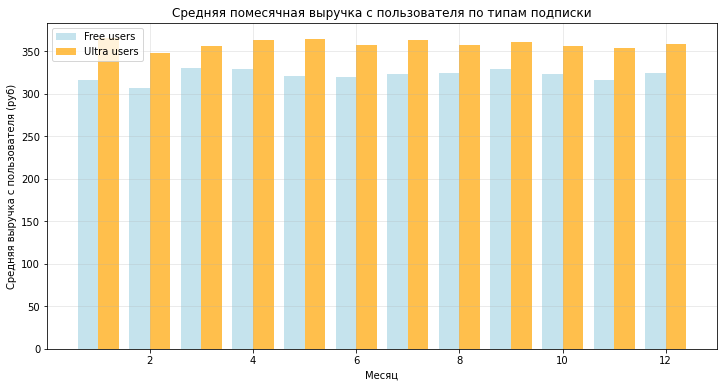

In [45]:
# Разделяем данные по типам подписки
free_revenue = revenue_pivot[revenue_pivot['subscription_type'] == 'free']['Общая прибыль с пользователя в месяц']
ultra_revenue = revenue_pivot[revenue_pivot['subscription_type'] == 'ultra']['Общая прибыль с пользователя в месяц']

# Проверка гипотезы: H0: μ_ultra ≤ μ_free, H1: μ_ultra > μ_free
t_stat, p_value = stats.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print("Проверка гипотезы: выручка от пользователей с подпиской выше, чем от пользователей без подписки")
print(f"H0: μ_ultra ≤ μ_free")
print(f"H1: μ_ultra > μ_free")

print(f"\nВыборочная статистика:")
print(f"Средняя месячная выручка (free): {free_revenue.mean():.2f} руб")
print(f"Средняя месячная выручка (ultra): {ultra_revenue.mean():.2f} руб")
print(f"Количество месяцев (free): {len(free_revenue)}")
print(f"Количество месяцев (ultra): {len(ultra_revenue)}")

print(f"\nРезультаты теста:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:}")

# Вывод
alpha = 0.05
if p_value < alpha:
    print(f"\nВывод: Отвергаем H0 (p < {alpha})")
    print("Выручка от пользователей с подпиской ВЫШЕ, чем от пользователей без подписки")
else:
    print(f"\nВывод: Не отвергаем H0 (p >= {alpha})")
    print("Нет достаточных оснований утверждать, что выручка от ultra выше")

# Визуализация
plt.figure(figsize=(12, 6))
months = revenue_pivot['Месяц'].unique()

# Правильная агрегация для графика - средние значения по месяцам
monthly_avg = revenue_pivot.groupby(['Месяц', 'subscription_type'])['Общая прибыль с пользователя в месяц'].mean().reset_index()

free_monthly = monthly_avg[monthly_avg['subscription_type'] == 'free']
ultra_monthly = monthly_avg[monthly_avg['subscription_type'] == 'ultra']

plt.figure(figsize=(12, 6))
plt.bar(free_monthly['Месяц'] - 0.2, free_monthly['Общая прибыль с пользователя в месяц'], 
        width=0.4, label='Free users', alpha=0.7, color='lightblue')
plt.bar(ultra_monthly['Месяц'] + 0.2, ultra_monthly['Общая прибыль с пользователя в месяц'], 
        width=0.4, label='Ultra users', alpha=0.7, color='orange')

plt.xlabel('Месяц')
plt.ylabel('Средняя выручка с пользователя (руб)')
plt.title('Средняя помесячная выручка с пользователя по типам подписки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Судя по графику, помесячная выручка от пользователей с подпиской выше.

### **6.4. Снизилось ли количество обращений в техподдержку?**

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Для проверки этой гипотезы понадобится парный односторонний st.ttest_rel(a, b). Парный t-тест (односторонний, так как ожидаем снижение) используется для сравнения двух связанных выборок (например, измерения до и после для одних и тех же объектов).

Данных в таблице (столбцов) об обращении в тех.поддержку нет.

# **7 Распределения**

### **7.1 Сколько разослать промокодов**

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() 

Параметры биномиального распределения:
p = 0.1 (вероятность продления подписки)
Цель: минимум 100 продлений
Допустимый риск: 5.0%

Результат:
Минимальное количество промокодов: 1170
Фактический риск не выполнить план: 0.0416 (4.16%)

Проверка для N = 1170:
Ожидаемое количество продлений: 117.0
P(X < 100) = 0.0416
P(X >= 100) = 0.9584


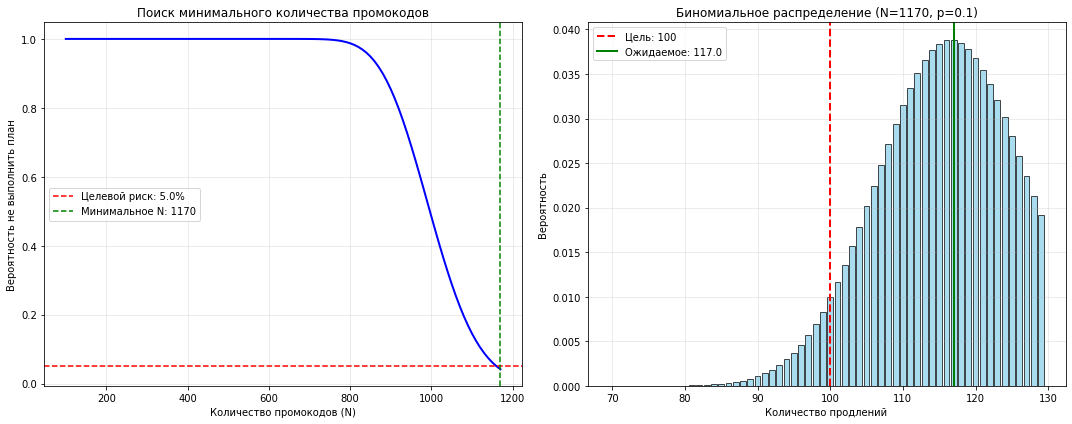

In [46]:
# Параметры задачи
p = 0.1  # вероятность продления подписки
target = 100  # минимальное количество продлений
risk = 0.05  # вероятность не выполнить план (5%)

# Функция для поиска минимального N
def find_min_n(p, target, risk):
    n_values = []
    probabilities = []
    
    # Проверяем разные значения N
    for n in range(target, 2000, 10):
        # P(X < 100) = P(X <= 99) - вероятность не выполнить план
        prob_fail = binom.cdf(target - 1, n, p)
        
        n_values.append(n)
        probabilities.append(prob_fail)
        
        # Если вероятность провала <= 5%, то это наш ответ
        if prob_fail <= risk:
            return n, prob_fail, n_values, probabilities
    
    return None, None, n_values, probabilities

# Находим минимальное N
min_n, actual_risk, n_vals, probs = find_min_n(p, target, risk)

print("Параметры биномиального распределения:")
print(f"p = {p} (вероятность продления подписки)")
print(f"Цель: минимум {target} продлений")
print(f"Допустимый риск: {risk*100}%")

print(f"\nРезультат:")
print(f"Минимальное количество промокодов: {min_n}")
print(f"Фактический риск не выполнить план: {actual_risk:.4f} ({actual_risk*100:.2f}%)")

# Проверка для найденного N
dist = binom(min_n, p)
expected_renewals = min_n * p
prob_less_than_100 = dist.cdf(99)
prob_100_or_more = 1 - prob_less_than_100

print(f"\nПроверка для N = {min_n}:")
print(f"Ожидаемое количество продлений: {expected_renewals:.1f}")
print(f"P(X < 100) = {prob_less_than_100:.4f}")
print(f"P(X >= 100) = {prob_100_or_more:.4f}")

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Зависимость риска от количества промокодов
ax1.plot(n_vals, probs, 'b-', linewidth=2)
ax1.axhline(y=risk, color='red', linestyle='--', label=f'Целевой риск: {risk*100}%')
ax1.axvline(x=min_n, color='green', linestyle='--', label=f'Минимальное N: {min_n}')
ax1.set_xlabel('Количество промокодов (N)')
ax1.set_ylabel('Вероятность не выполнить план')
ax1.set_title('Поиск минимального количества промокодов')
ax1.grid(True, alpha=0.3)
ax1.legend()

# График 2: Распределение для найденного N
x = np.arange(70, 130)
pmf = dist.pmf(x)
ax2.bar(x, pmf, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(x=target, color='red', linestyle='--', linewidth=2, label=f'Цель: {target}')
ax2.axvline(x=expected_renewals, color='green', linestyle='-', linewidth=2, 
           label=f'Ожидаемое: {expected_renewals:.1f}')
ax2.set_xlabel('Количество продлений')
ax2.set_ylabel('Вероятность')
ax2.set_title(f'Биномиальное распределение (N={min_n}, p={p})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Нужно разослать 1170 промокодов, чтобы вероятность не выполнить план составляла примерно 5%.

### **7.3. Оценка вероятности открыть уведомление**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Мы можем воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

Параметры биномиального распределения:
n = 1,000,000
p = 0.4
Математическое ожидание: μ = 400,000
Стандартное отклонение: σ = 490

Проверка условий аппроксимации:
np = 400,000 >= 5 ✓
n(1-p) = 600,000 >= 5 ✓

Вероятность с нормальной аппроксимацией:
P(X ≤ 399,500) ≈ 0.153959
Z-score: -1.0196


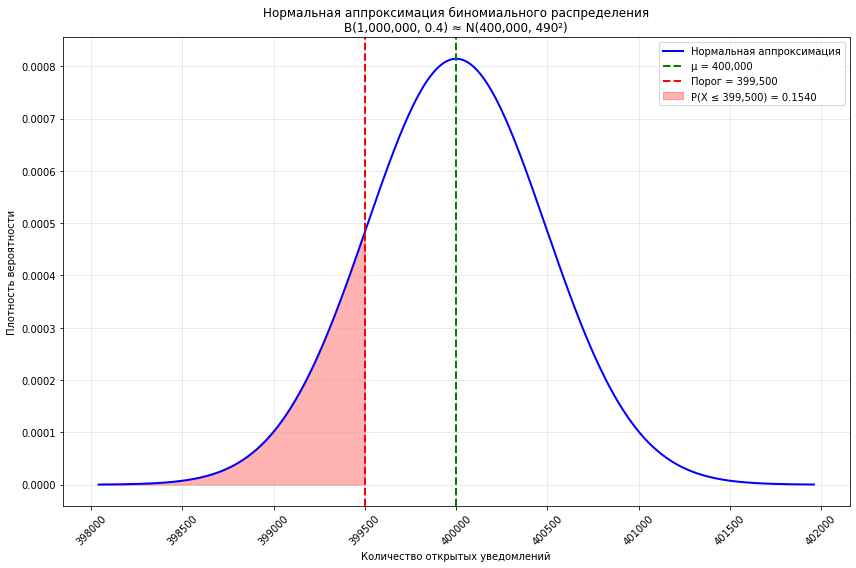


Дополнительная статистика:
Вероятность открыть ровно μ = 400,000: 0.00081434
68% значений лежат в интервале: [399,510, 400,490]
95% значений лежат в интервале: [399,020, 400,980]
99.7% значений лежат в интервале: [398,530, 401,470]


In [47]:
# Параметры задачи
n = 1_000_000  # количество уведомлений
p = 0.4        # вероятность открытия уведомления
threshold = 399_500  # не более 399.5 тыс. пользователей

# Параметры нормальной аппроксимации
mu = n * p                     # математическое ожидание
sigma = np.sqrt(n * p * (1-p)) # стандартное отклонение

print("Параметры биномиального распределения:")
print(f"n = {n:,}")
print(f"p = {p}")
print(f"Математическое ожидание: μ = {mu:,.0f}")
print(f"Стандартное отклонение: σ = {sigma:.0f}")

# Проверка условий нормальной аппроксимации
print(f"\nПроверка условий аппроксимации:")
print(f"np = {n*p:,.0f} >= 5 ✓")
print(f"n(1-p) = {n*(1-p):,.0f} >= 5 ✓")

# Нормальная аппроксимация с поправкой на непрерывность
# P(X <= 399500) ≈ P(Z <= (399500.5 - μ)/σ)
z_score = (threshold + 0.5 - mu) / sigma
prob_normal = norm.cdf(z_score)

print(f"\nВероятность с нормальной аппроксимацией:")
print(f"P(X ≤ {threshold:,}) ≈ {prob_normal:.6f}")
print(f"Z-score: {z_score:.4f}")

# Построение графика
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 8))

# График нормального распределения
plt.plot(x, y, 'b-', linewidth=2, label='Нормальная аппроксимация')

# Закрашиваем область P(X ≤ 399500)
x_fill = x[x <= threshold]
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='red', 
                 label=f'P(X ≤ {threshold:,}) = {prob_normal:.4f}')

# Вертикальные линии
plt.axvline(mu, color='green', linestyle='--', linewidth=2, 
           label=f'μ = {mu:,.0f}')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Порог = {threshold:,}')

plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.title('Нормальная аппроксимация биномиального распределения\n' + 
          f'B({n:,}, {p}) ≈ N({mu:,.0f}, {sigma:.0f}²)')
plt.legend()
plt.grid(True, alpha=0.3)

# Форматирование оси X
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Дополнительная информация
print(f"\nДополнительная статистика:")
print(f"Вероятность открыть ровно μ = {mu:,.0f}: {norm.pdf(mu, mu, sigma):.8f}")
print(f"68% значений лежат в интервале: [{mu-sigma:,.0f}, {mu+sigma:,.0f}]")
print(f"95% значений лежат в интервале: [{mu-2*sigma:,.0f}, {mu+2*sigma:,.0f}]")
print(f"99.7% значений лежат в интервале: [{mu-3*sigma:,.0f}, {mu+3*sigma:,.0f}]")

Вероятность открыть не более порогового значения в 399.500 уведолений равна 15%.

Вероятность открыть ровно 400.000 равна 0.08%.

# **8. Общий вывод**

1) Для пердобработки данных мы оценили качество данных и нормализовали их.

2) Описали и визуализировали общую информацию о пользователях и поездках:
* **частота встречаемости городов:** больше всего пользователей в Пятигорске. Меньше всего пользователей в Москве. Вероятно, наиболее удобны и интересны самокаты для жителей небольших городов;
* **соотношение пользователей** 
* - с подпиской - 54%: пользоваталей с подпиской на 15% больше;
* - и без подписки - 46%;
* **возраст пользователей:** Самокатами пользуются лица от 12 до 45 лет, Наиболее популярны среди 20-30-летних; средний возраст пользователей 25 лет;
* **расстояние, которое пользователь преодолел за одну поездку в среднем:** 3070-3133 м.;
* **продолжительность поездок:** в среднем 18 мин.

3) Объединили данные;
* о пользователях, поездках и подписках в один датафрейм.
* создали ещё два датафрейма из датафрейма, созданного выше:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

4) Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

5) Подсчитали выручку; 

6) Создали датафрейм с агрегированными данными о поездках: 
* нашли суммарное расстояние;
* количество поездок;
* суммарное время для каждого пользователя за каждый месяц.

7) В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь. 

8) <b><u>Проверили гипотезы:</u></b>
* **Тратят ли пользователи с подпиской больше времени на поездки?** 
В среднем **пользователи с подпиской тратят времени на поездки на 6% больше** (или на 1 мин 16 сек), Но судя по тесту, значения практически одинаковы и не различимы, что можно списать на статистическую погрешность и сделать вывод, что пользователи с подпиской и без тратят одинаковое время на поездку.
* **Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**
Нет достаточных оснований утверждать, что среднее расстояние превышает 3130 м. Среднее расстояние с подпиской 3115 м.

* **Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**
Да, помесячная выручка от пользователей с подпиской оказалась выше.
* - Средняя месячная выручка (free): 321.75 руб
* - Средняя месячная выручка (ultra): 358.59 руб

* **Снизилось ли количество обращений в техподдержку после обновления сервера?**
Для проверки этой гипотезы понадобится парный односторонний st.ttest_rel(a, b). Парный t-тест (односторонний, так как ожидаем снижение) используется для сравнения двух связанных выборок (например, измерения до и после для одних и тех же объектов). Данных по обращению в техподдежку представлено не было.

9) Выяснили, что **необходимо разослать минимум 1170 промокодов**, чтобы вероятность не выполнить план была примерно 5%.

10) С помощью аппроксимации построили график распределения и выяснили, что **вероятность составляет 15%, что уведомление откроют не более 399,5 тыс. пользователей**.

# **9.Рекомендации по развитию сервиса аренды самокатов GoFast**

1. Активно продвигать сервис аренды среди своей целевой аудитории 20-30 летних: так будет легче и эфективней. 
2. Продвигать сервис среди небольших городов с плохой транспортной доступностью, большими расстояниями и повышенной температурой (Например, Кавказ: Пятигорск, Сочи-Красная поляна) - сервис наиболее популярен среди небольших и средних городов.
3. Продолжать продавать подписку на сервис "Ultra", так как пользователи с подпиской приносят больше денег;
4. Разослать минимум 1170 промокодов для продвижения сервиса.